# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression

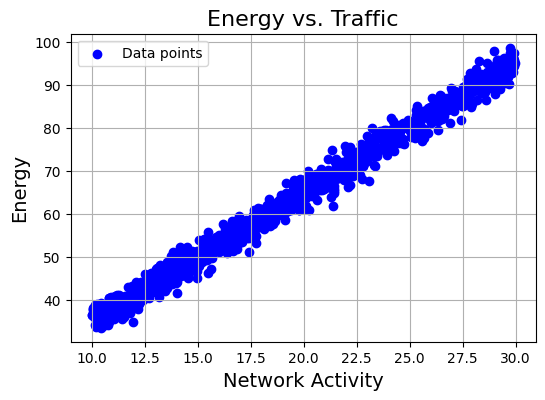

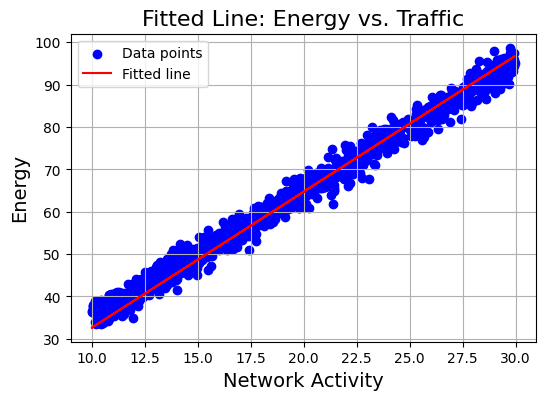

In [4]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

lr.predict(data['Net_Activity'])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], lr.predict(data['Net_Activity']), c='red', label='Fitted line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Fitted Line: Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()   


#### b)

An unbiased estimator is a statistical estimator whose expected value is equal to the true value of the parameter being estimated.
In other words, on average, the estimator hits the true parameter value. For example, in linear regression, the least squares estimator
is unbiased if the errors have zero mean and are uncorrelated with the predictors.


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [6]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [7]:
from logistic_regression import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

In [8]:
X_train = train[['x0', 'x1']].values
y_train = train['y'].values
X_test = test[['x0', 'x1']].values
y_test = test['y'].values

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.488


#### Lets try improving

In [9]:
X_train_enhanced = np.c_[X_train, X_train[:, 0] * X_train[:, 1], X_train[:, 0]**2, X_train[:, 1]**2]
X_test_enhanced = np.c_[X_test, X_test[:, 0] * X_test[:, 1], X_test[:, 0]**2, X_test[:, 1]**2]

lr = LogisticRegression(learning_rate=0.01, n_iterations=1000)

lr.fit(X_train_enhanced, y_train)

y_pred = lr.predict(X_test_enhanced)

accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, lr.sigmoid(np.dot(X_test_enhanced, lr.weights) + lr.bias))
roc_auc = auc(fpr, tpr)

print(f'Accuracy: {accuracy}')

Accuracy: 0.884


#### 3. Discussion

#### a)

Logistic regression assumes a linear relationship between the features and the log-odds of the output (0 or 1). If the underlying relationship between the features (x0, x1) and the target variable is non-linear or involves complex interactions, a simple linear model will struggle to capture those patterns.

Initially, the model used only x0 and x1 as features, without incorporating possible interactions or non-linear transformations of these signals.

#### b)

In the case of logistic regression, its inductive bias is the assumption that there is a linear relationship between the input features and the log-odds of the binary target.

This inductive bias is crucial for several reasons:

- Generalization: A model's ability to generalize depends on the correctness of its inductive bias. A model with a strong bias (e.g., assuming linearity) may perform well if the data indeed follows the assumed structure. However, it may struggle if the data has more complex, non-linear relationships.

- Flexibility vs simplicity: A model with too rigid an inductive bias (like linear logistic regression) may underfit the data, while a model with a weaker bias (e.g., a decision tree or neural network) can overfit if not regularized.

In our case, the linear assumption of logistic regression was too restrictive. By engineering additional non-linear features, we relaxed this bias, allowing the model to better capture the complexity of the data.

#### c) - DecisionTreeClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f'Accuracy: {accuracy}')

Accuracy: 0.874


Yes, the DecisionTreeClassifier can solve the problem. In fact, after training the decision tree, it achieved an accuracy of 0.876, which was higher than the original logistic regression (0.49)

Decision trees do not assume any specific form of the relationship between the features and the target variable. Instead, they create piecewise constant decision boundaries, which allow them to naturally capture complex, non-linear interactions in the data.

No Need for Feature Engineering: Unlike logistic regression, decision trees can automatically find interactions and relationships between the features. This flexibility allows them to perform well without manually adding interaction or polynomial features.

#### d) Plot ROC curve

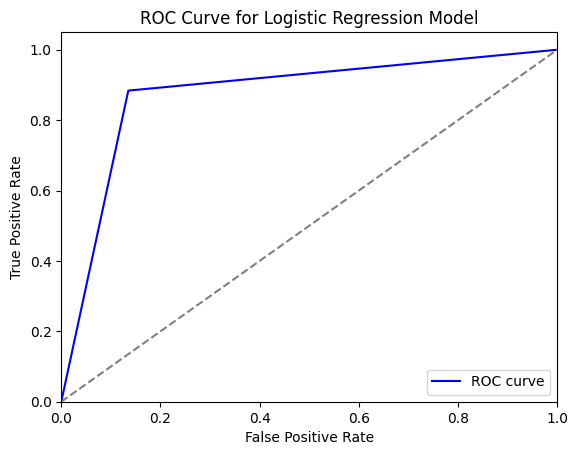

In [11]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [12]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

In [13]:
from sklearn.metrics import roc_auc_score

In [14]:
X_train = train.drop(columns=["target"])
y_train = train["target"]

X_test = test.drop(columns=["target"])
y_test = test["target"]

X_train['new_feature'] = (X_train['data_stream_3'] * 1000).astype(int) % 2
X_test['new_feature'] = (X_test['data_stream_3'] * 1000).astype(int) % 2

dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=20, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.7270844167934717


#### Discussion


#### a)

What I did was playing around with the hyperparameters based on a grid search optimizer.

A new feature is added using the transformation (X['data_stream_3'] * 1000).astype(int) % 2, which is applied to both the training and test sets. 


#### b) - roc curve

ROC AUC is a robust metric for binary classification problems, especially when you care about the ranking of predictions rather than precise class labels. It evaluates the model's ability to discriminate between the positive and negative classes.

It is threshold-independent, i.e. it evaluates the model across all possible classification thresholds, which is particularly useful when we’re more interested in the ranking of predicted probabilities rather than hard binary classifications.

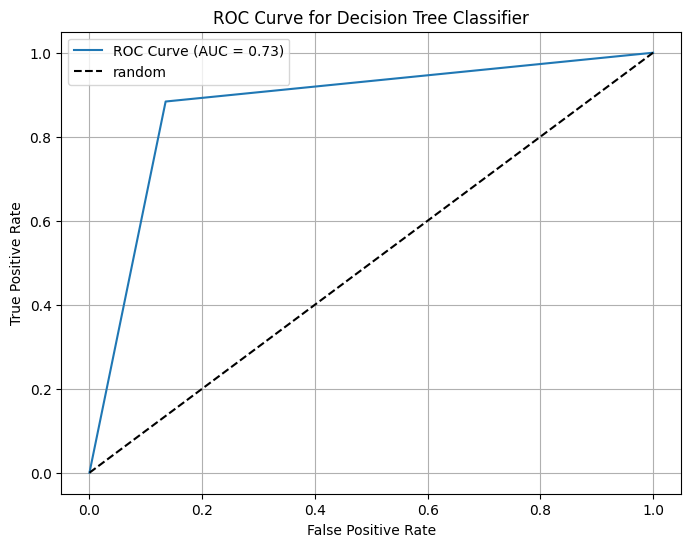

In [15]:
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### c) - Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred)

print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.7295145777555201


Almost 0.73 which is slightly better result than DecisionTreeClassifier


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
import numpy as np

train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(train.drop(columns=['nexus_rating']))
y = train['nexus_rating']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2 = RandomForestRegressor(n_estimators=200, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

rf1.fit(X_train, y_train)
rf2.fit(X_train, y_train)
gb.fit(X_train, y_train)

y_pred_rf1 = rf1.predict(X_val)
y_pred_rf2 = rf2.predict(X_val)
X_test = imputer.transform(test.drop(columns=['nexus_rating']))

y_pred_gb = gb.predict(X_val)

stacked_predictions = np.column_stack((y_pred_rf1, y_pred_rf2, y_pred_gb))

meta_model = RandomForestRegressor(n_estimators=100, random_state=42)
meta_model.fit(stacked_predictions, y_val)

y_pred_test_rf1 = rf1.predict(X_test)
y_pred_test_rf2 = rf2.predict(X_test)
y_pred_test_gb = gb.predict(X_test)

final_stacked_pred = np.column_stack((y_pred_test_rf1, y_pred_test_rf2, y_pred_test_gb))
final_pred = meta_model.predict(final_stacked_pred)

rmsle_score = rmsle(y_val, meta_model.predict(stacked_predictions)) 
print(f'RMSLE: {rmsle_score}')


RMSLE: 0.13763539278462525


#### Discussion

#### a)

The strategy involved using an ensemble of different models (Random Forest, Gradient Boosting).
Then, predictions from these models were stacked and fed into a meta-model (another Random Forest) to improve the final prediction.


#### b) 

RMSLE is particularly useful for tasks where the target variable (e.g., "Nexus Rating") spans a wide range of values. The logarithmic transformation penalizes under-predictions and over-predictions in a proportional way, which is beneficial for cases where extreme values (e.g., very high or low energy nexus ratings) are present.

RMSLE is appropriate in this case because:
- It reduces the impact of large differences between predictions and actual values.
- It is less sensitive to outliers compared to metrics like RMSE.

The loss function used is Mean Squared Logarithmic Error:
$$
\text{MSLE} = \frac{1}{n}\sum_{i=1}^{n} \left( \log(1 + y_{\text{true},i}) - \log(1 + y_{\text{pred},i}) \right)^2
$$

#### c) 

Plot of feature importances

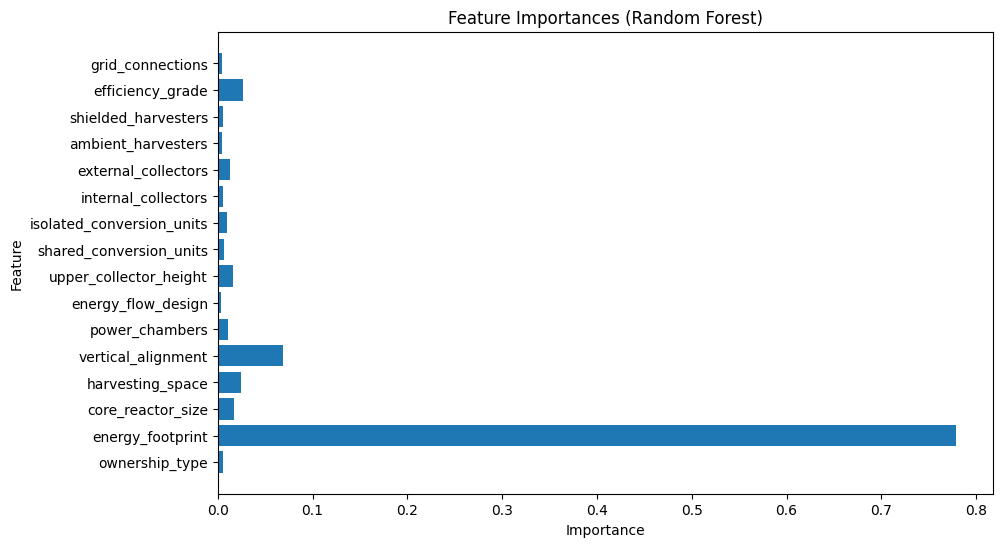

In [18]:
feature_importances = rf1.feature_importances_
features = train.drop(columns=['nexus_rating']).columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()

#### d)



We used stacking, where predictions from multiple models (Random Forests and Gradient Boosting) were combined using a meta-model. The idea is to benefit from the strengths of different models and reduce individual weaknesses by combining their predictions.

#### e)

Would use following methods:

- Regularize models to prevent overfitting.
- Perform hyperparameter tuning.